In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def warm_up():
    return np.identity(5)

In [23]:
def plot_data(x, y):
    plt.scatter(x, y, s = 10, color = 'purple')
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')

In [35]:
def compute_cost(theta, X, y):
    return np.sum((X.dot(theta) - y)**2) / (2*y.shape[0])

In [48]:
def compute_step(X, y, theta, alpha):
    new_theta = theta - X.T.dot(X.dot(theta) - y) * (alpha / y.shape[0])
    #print(new_theta)
    return new_theta

In [4]:
warm_up()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [11]:
food_truck_profits = np.loadtxt('./ex1.csv', delimiter=',')
len(food_truck_profits)

97

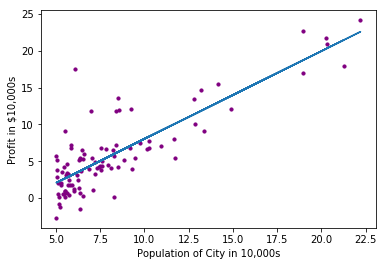

In [29]:
x = food_truck_profits[:,0]
y = food_truck_profits[:,1]
plot_data(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# Cost

In [40]:
X = np.insert(food_truck_profits[:,:-1], 0, 1, axis = 1)
y = food_truck_profits[:,-1:]

In [41]:
X.shape

(97, 2)

In [36]:
theta_0 = np.zeros((2,1))
print(f'Your computed cost:     {compute_cost(theta_0, X, y)}')

Your computed cost:     32.072733877455676


array([[0., 0.],
       [0., 0.]])

# Gradient Descent

In [46]:
def gradient_descent(X, y, theta_0, step_func, cost_func, alpha = 0.01, num_iters = 1500, verbose = True):
    theta = np.copy(theta_0)
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = step_func(X, y, theta, alpha)
        cost_history[i] = cost_func(theta, X, y)
        if (verbose and (i < 10 or i%10 == 0)):
            print(f'Iteration: {i:04}, Cost: {cost_history[i]}')
    return theta, cost_history

In [49]:
theta_converged, cost_history = gradient_descent(X, y, theta_0, compute_step, compute_cost)

Iteration: 0000, Cost: 6.737190464870004
Iteration: 0001, Cost: 5.9315935686049555
Iteration: 0002, Cost: 5.901154707081388
Iteration: 0003, Cost: 5.895228586444221
Iteration: 0004, Cost: 5.8900949431173295
Iteration: 0005, Cost: 5.885004158443647
Iteration: 0006, Cost: 5.879932480491418
Iteration: 0007, Cost: 5.874879094762575
Iteration: 0008, Cost: 5.869843911806385
Iteration: 0009, Cost: 5.8648268653129305
Iteration: 0010, Cost: 5.8598278899321805
Iteration: 0020, Cost: 5.810817842627869
Iteration: 0030, Cost: 5.76354476854712
Iteration: 0040, Cost: 5.717947107333528
Iteration: 0050, Cost: 5.673965480401506
Iteration: 0060, Cost: 5.631542613611772
Iteration: 0070, Cost: 5.590623262687323
Iteration: 0080, Cost: 5.551154141272754
Iteration: 0090, Cost: 5.513083851543225
Iteration: 0100, Cost: 5.476362817272741
Iteration: 0110, Cost: 5.440943219274565
Iteration: 0120, Cost: 5.406778933129694
Iteration: 0130, Cost: 5.373825469122317
Iteration: 0140, Cost: 5.342039914304029
Iteration: 01

In [51]:
theta_solution, _ = gradient_descent(X, y, theta_0, compute_step, compute_cost, verbose=False)
print(f'Your converged parameters:\n{theta_converged}\n')
print(f'Expected converged parameters:\n{theta_solution}')

Your converged parameters:
[[-3.63029144]
 [ 1.16636235]]

Expected converged parameters:
[[-3.63029144]
 [ 1.16636235]]


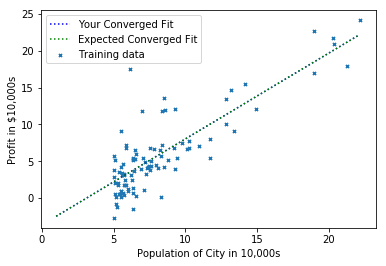

In [53]:
fit_X = np.arange(np.min(X), np.max(X))
aug_fit_X = np.column_stack([np.ones(len(fit_X)), fit_X])
plt.scatter(X[:,1], y, s = 10, marker = 'x', label = 'Training data')
plt.plot(fit_X, aug_fit_X.dot(theta_converged), 'b:', label = 'Your Converged Fit')
plt.plot(fit_X, aug_fit_X.dot(theta_solution), 'g:', label = 'Expected Converged Fit')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend();

In [54]:
def predict(population):
    prediction = np.array([[ 1, population ]]).dot(theta_converged)[0][0]
    print(f'For a population of {population} (ten thousands), the model predicts a profit of {prediction}')
predict(3.5)
predict(7.0)

For a population of 3.5 (ten thousands), the model predicts a profit of 0.4519767867701767
For a population of 7.0 (ten thousands), the model predicts a profit of 4.534245012944714
